In [1]:

import os
import numpy as np
import torch
import math
import cv2
import sys
import time
import argparse
from PIL import Image
import torchvision
from torch import nn, Tensor
from torchvision.transforms import functional as F
from torchvision.transforms import transforms as T
from typing import List, Tuple, Dict, Optional
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt

In [7]:

ori_dir='/home/jini1114/git/MODNet/input'
model_path = '/home/jini1114/git/MODNet/model'
jpg_dir='/home/jini1114/git/MODNet/output'
seg_dir='/home/jini1114/git/MODNet/segmentation'

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

folder = 'r_cut_비챤.mp4'
#for folder in os.listdir(ori_dir):

if not(os.path.exists(os.path.join(seg_dir,folder))):
    os.system('mkdir -p '+os.path.join(seg_dir,folder))
    
data_path = os.path.join("/home/jini1114/git/MODNet/data/",folder)
model_name = '%s.pt'%(folder) 

        
model = torch.load(os.path.join(model_path,model_name))
model.eval()
model.to(device)

files = os.listdir(os.path.join(jpg_dir,folder))

for idx in tqdm(range(len(files))):
    img = cv2.imread(os.path.join(jpg_dir,folder,'%d.jpg'%(idx)))
    img = img.astype(np.float32)
    img = img/255

    output = model(torch.tensor([img.transpose(2,0,1)]).to(device))
    cv2.imwrite(os.path.join(seg_dir,folder,'%d.png'%(idx)),
                output[0]['masks'].detach().cpu().numpy()[0][0])


100%|██████████| 16198/16198 [44:46<00:00,  6.03it/s]


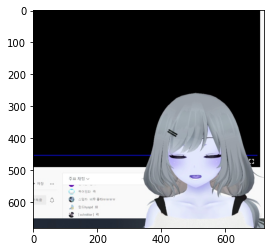

In [9]:
plt.imshow(img)

In [5]:
ori_dir='/home/jini1114/git/MODNet/input'
model_path = '/home/jini1114/git/MODNet/model'
jpg_dir='/home/jini1114/git/MODNet/output'
seg_dir='/home/jini1114/git/MODNet/segmentation'

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


for folder in os.listdir(ori_dir):
    print(folder)

r_cut_비챤.mp4
r_cut_주르르.mp4
r_cut_고세구.mp4
r_cut_징버거.mp4
r_cut_아이네.mp4
r_cut_릴파.mp4


In [ ]:
cv2.imwrite(os.path.join(seg_dir,folder,'%d.png'%(idx)),output[0]['masks'].detach().cpu().numpy()[0][0])

In [7]:
output[0]['masks'].detach().cpu().numpy()[0][0]

(680, 720)

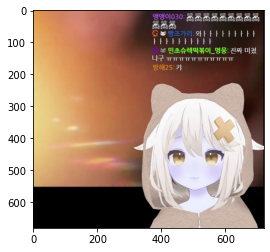

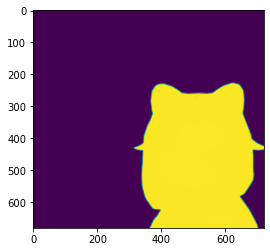

/usr/anaconda3/envs/hair_task/lib/python3.6/site-packages/torchvision/ops/boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)


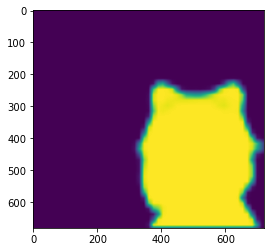

In [2]:
model_path = '/home/jini1114/git/MODNet/model'
data_path = "/home/jini1114/git/MODNet/data/r_cut_고세구.mp4"

model_name = 'r_cut_고세구.mp4.pt'

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')



files = os.listdir(os.path.join(data_path,'Images'))

thrshold = 150
img = cv2.imread(os.path.join(data_path,'Images',files[0]))
img = img.astype(np.float32)
img = img/255

mask = cv2.imread(os.path.join(data_path,'Masks',files[0][:-3]+'png'))
mask = mask[:,:,0]
        
model = torch.load(os.path.join(model_path,model_name))
model.eval()
model.to(device)

plt.imshow(img)
plt.show()
plt.imshow(mask)
plt.show()

output = model(torch.tensor([img.transpose(2,0,1)]).to(device))

plt.imshow(output[0]['masks'].detach().cpu().numpy()[0][0])
plt.show()

[{'boxes': tensor([[312.2459, 233.6582, 712.7530, 676.7997]], device='cuda:0',
         grad_fn=<StackBackward>),
  'labels': tensor([1], device='cuda:0'),
  'scores': tensor([0.9973], device='cuda:0', grad_fn=<IndexBackward>),
  'masks': tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [0.0000, 0.0000, 0.0000,  ..., 0.0057, 0.0040, 0.0023],
            [0.0000, 0.0000, 0.0000,  ..., 0.0049, 0.0035, 0.0020],
            [0.0000, 0.0000, 0.0000,  ..., 0.0042, 0.0029, 0.0017]]]],
         device='cuda:0', grad_fn=<UnsqueezeBackward0>)}]